In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [6]:
qubits = 3
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 2**qubits - 1 # number of training points
classToFilterOut: int = 2

In [7]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)
print(yTrain)

[[ 0.3355  0.1403  0.367  -0.0095  0.1099  0.6184  0.1654  0.4871  0.3485
   0.0118 -0.6246 -0.822  -0.6554 -0.7211 -0.8273 -0.319  -0.8044 -0.4063
  -0.7158 -0.696   0.334   0.1439  0.2559 -0.0642  0.0293  0.4187  0.0831
   0.9952 -0.0014 -0.0376]
 [-0.2315 -0.1674 -0.261  -0.517  -0.3152 -0.6845 -0.7538 -0.6686 -0.4384
  -0.7102 -0.8559 -0.7906 -0.8737 -0.9137 -0.7986 -0.8791 -0.919  -0.6506
  -0.9137 -0.9493 -0.2764  0.0485 -0.3297 -0.5847 -0.1055 -0.6538 -0.5668
   0.0515 -0.5624 -0.6892]
 [-0.6906 -0.5624 -0.6859 -0.8467 -0.0346 -0.4373 -0.6848 -0.6059 -0.3101
  -0.0383 -0.8144 -0.509  -0.9208 -0.9407 -0.4033 -0.3932 -0.7978 -0.415
  -0.4566 -0.537  -0.7617 -0.5421 -0.7896 -0.8991 -0.0883 -0.595  -0.6968
  -0.3303 -0.5888 -0.4493]
 [-0.5041 -0.3013 -0.5069 -0.7373  0.0286 -0.4122 -0.6169 -0.7847  0.0747
  -0.2005 -0.9496 -0.8074 -0.9784 -0.9784 -0.69   -0.7037 -0.7997 -0.6252
  -0.8503 -0.7984 -0.6279 -0.3523 -0.6542 -0.8377 -0.0883 -0.6037 -0.4353
  -0.4441 -0.549  -0.5625]
 [-0.

# VQLS-LSSVM state vectors

Condition number of the matrix:  3892.1441127779235
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     107.0351   4.0359   1.7362   3.2722   4.0384   2.75     3.4024]
 [  1.       4.0359 112.1502  10.0144  11.2856   8.0465  13.0442  12.7517]
 [  1.       1.7362  10.0144 111.1957  11.1584   7.4716  12.481   11.7199]
 [  1.       3.2722  11.2856  11.1584 112.2137   8.139   13.2935  12.7649]
 [  1.       4.0384   8.0465   7.4716   8.139  106.723    8.8105   8.713 ]
 [  1.       2.75    13.0442  12.481   13.2935   8.8105 115.5314  14.683 ]
 [  1.       3.4024  12.7517  11.7199  12.7649   8.713   14.683  114.2075]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(97.38207096500298+0j), (8.459100173113468+0j), 

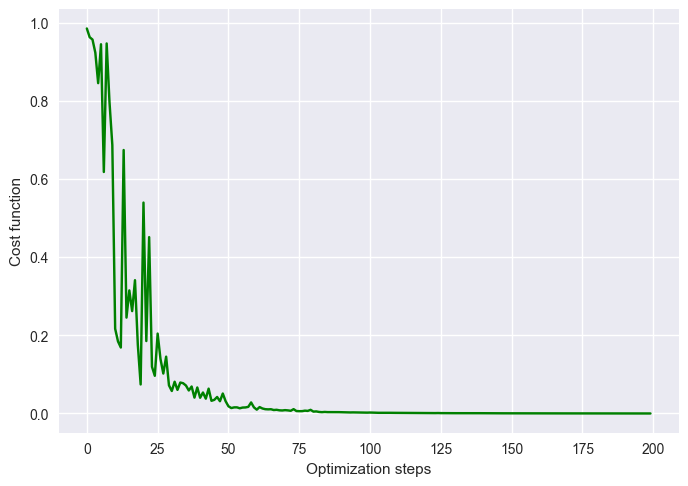

In [10]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")
vqlssvmVectors.plotCost()

In [8]:
print(vqlssvmVectors.predict(xTest))

[ 0.7069+0.j  0.3049+0.j  0.3858+0.j  0.7251+0.j  0.2749+0.j  0.4785+0.j
  0.7092+0.j  0.5784+0.j  0.622 +0.j  0.3773+0.j  0.5853+0.j  0.5132+0.j
  0.5201+0.j  0.1947+0.j  0.6067+0.j  0.6738+0.j  0.5575+0.j -0.2646+0.j
  0.2641+0.j  0.7016+0.j  0.4364+0.j  0.1019+0.j  0.8513+0.j  0.2108+0.j
 -0.2699+0.j  0.1447+0.j  0.4114+0.j  0.5088+0.j  0.5459+0.j  0.326 +0.j
  0.7277+0.j  0.6771+0.j  0.7031+0.j  0.1839+0.j  0.479 +0.j  0.3099+0.j
  0.5106+0.j  0.0989+0.j  0.362 +0.j  0.2562+0.j  0.2577+0.j  0.638 +0.j
  0.2678+0.j  0.7101+0.j  0.1366+0.j  0.5816+0.j  0.6578+0.j -0.2092+0.j
  0.7065+0.j  0.529 +0.j  0.2185+0.j  0.667 +0.j  0.5064+0.j  0.6951+0.j
  0.6009+0.j  0.6124+0.j  0.6543+0.j  0.4749+0.j  0.6319+0.j  0.6676+0.j
  0.3914+0.j  0.2527+0.j  0.537 +0.j  0.5209+0.j  0.4826+0.j  0.136 +0.j
  0.7304+0.j  0.6778+0.j  0.2348+0.j  0.6712+0.j  0.3531+0.j  0.7619+0.j
  0.6809+0.j  0.3917+0.j  0.4664+0.j  0.6067+0.j  0.161 +0.j  0.6181+0.j
  0.0405+0.j  0.7863+0.j  0.154 +0.j  0.873 +0.j  0

In [12]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 0.2669039145907473


# VQLS-LSSVM quantum

Condition number of the matrix:  3748.523782404488
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     118.0167   7.6175  11.4527  15.5729   8.7339   5.8932  15.6514]
 [  1.       7.6175 108.4428   5.4887   8.1991   8.2087   4.7144   6.8691]
 [  1.      11.4527   5.4887 108.2338  10.3489   6.016    3.8023  10.2264]
 [  1.      15.5729   8.1991  10.3489 114.8472   8.6718   5.9916  13.5647]
 [  1.       8.7339   8.2087   6.016    8.6718 108.9952   4.6692   7.4577]
 [  1.       5.8932   4.7144   3.8023   5.9916   4.6692 103.8825   5.4803]
 [  1.      15.6514   6.8691  10.2264  13.5647   7.4577   5.4803 114.3191]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(97.09215689082643+0j), (5.160201281771034+0j), (

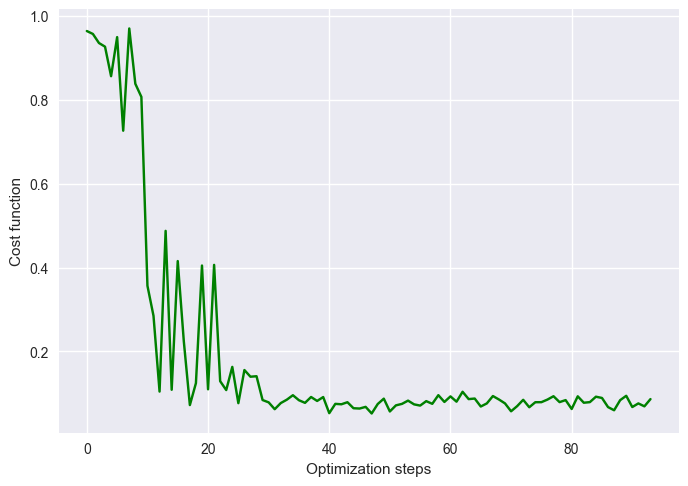

In [ ]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200, threads=4, jobs=10, circuitConstructionThreading=True)

vqlssvmQuantum.plotCost()

In [ ]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [ ]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [ -5.2179+0.j  -4.9279+0.j  -3.7095+0.j  -9.5472+0.j  -9.2655+0.j
  -7.3349+0.j  -8.8588+0.j  -6.7639+0.j  -8.3933+0.j  -7.9403+0.j
  -5.3427+0.j  -7.9979+0.j  -7.4843+0.j  -8.1637+0.j  -7.9227+0.j
  -8.4084+0.j  -8.4406+0.j  -6.0339+0.j  -4.8581+0.j  -8.4186+0.j
  -5.5873+0.j  -8.7407+0.j  -7.4923+0.j  -6.9704+0.j  -7.8843+0.j
  -9.0826+0.j  -7.5552+0.j  -9.6029+0.j  -7.824 +0.j  -1.3282+0.j
  -6.5863+0.j  -7.7186+0.j  -5.4576+0.j  -7.0851+0.j  -4.7628+0.j
  -5.6459+0.j  -7.181 +0.j  -6.4166+0.j  -6.0642+0.j  -8.6544+0.j
  -4.285 +0.j  -9.004 +0.j  -7.0412+0.j  -5.2411+0.j  -9.0523+0.j
  -6.8499+0.j  -9.1594+0.j  -5.9314+0.j  -9.9891+0.j  -6.2774+0.j
  -5.622 +0.j  -8.0128+0.j  -8.468 +0.j  -6.3267+0.j  -7.6152+0.j
  -8.675 +0.j  -4.3981+0.j  -8.2709+0.j  -8.9086+0.j  -7.2798+0.j
  -7.6733+0.j  -5.8062+0.j  -8.4369+0.j  -8.4945+0.j  -7.4205+0.j
  -6.5936+0.j  -8.8937+0.j  -8.4791+0.j  -9.786 +0.j  -8.0322+0.j
  -7.175 +0.j  -9.0138+0.j  -8.0705+0.j  -5.8315+0.j  -7.7965+

# LSSVM (work in progresss)

In [ ]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [ ]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 0.9234875444839857
